# Final Project (100)

**Group #:** [11]

**Names:**

1. Harsh Saxena
2. Olid Sarker
3. Sarju Tuladhar
4. Shilpa Thiruguna Revanna Gowda

---



# Directions
In the Final Project, which will be submitted in two parts, your group will perform text analytics to solve a real-world business problem. As a group, you will choose one of the following 5 business problems and accompanying dataset.

<br>

| Business Problem (Prediction)| Topic | Data Type | Dataset Name |
| ----------- | ----------- | ----------- | ----------- |
| Rating or Sentiment|Lotion|Online reviews|lotion-reviews.csv|
| Spam Detection|         |E-mails|spam.csv|
| Rating or Recommendation | Airlines| Customer surveys| airlines.csv|
| Rating| Weight Loss Drugs|Customer surveys| weightloss.csv|
| Rating| Amazon Products| Online reviews|amazon_reviews.csv|

<br>

First, type your group number and group member names in the text cells above. You will include all prerequisite code necessary for your code in Parts 1 and 2 to run in the [Prerequisite Code](#scrollTo=1NApcFUYjX8g) Section below.

Rename this template file - <b>INFO585_Final_Group#.ipynb</b>, where # is the assignment number. As an example, Group 1's Final Project submission would be named **INFO585_Final_Group1.ipynb**.

<br>

**Overview:**

<br>

**Part 1**

**Due:** 11/26 at 11:59 PM ET

In Part 1, you will define the business problem, cleanse and preprocess the data, and perform exploratory data analysis. To complete Part 1, you will fill in the required information in the [Part 1](#scrollTo=cwyEfhMwUTT1) Section.

<br>

**Part 2**

**Due:** 12/17 at 11:59 PM ET

In Part 2, you will perform predictive analysis, evaluate your predictive models, and make recommendations and discuss your results within the context of the business problem. To complete Part 2, you will fill include all required information for Part 1 and fill in the required information in the [Part 2](#scrollTo=8fZ_eKishBVo) Section.


<hr>
<br>

# Prerequisite Code

In [ ]:
#[include any prerequisite code needed to run your code here]

import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve


!pip install -q -U tensorflow-text
!pip install -q tf-models-official

import tensorflow as tf
import tensorflow_hub as hub # pre-trained models
import tensorflow_text as text # text pre-processing functions
from official.nlp import optimization  # to create AdamW optimizer
from keras.backend import clear_session
from keras.metrics import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 5.0 MB/s eta 0:00:00


# Part 1 (50)

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

**Note:** Your Part 1 submission will only include responses for Part 1. Part 2 should remain blank or hidden in the Part 1 submission.

<br>

**Due:** 11/26 at 11:59 PM ET

**Points:** 50






## 1.1 Problem Definition & Statement (20)

**1.1 A (5) First, use the code cell below to identify your group's selected dataset and the target variable (column name) that will be used for predictive modeling.**

In [ ]:
# @title Identify Problem/Dataset


Dataset = 'amazon_reviews.csv' # @param ["lotion-reviews.csv", "spam.csv", "airlines.csv", "weightloss.csv", "amazon_reviews.csv"]
Target_Variable = "''sentiment', which will be created out of the column named 'overall' from the dataset." # @param {type:"string"}

print(Dataset)
print(Target_Variable)


amazon_reviews.csv
''sentiment', which will be created out of the column named 'overall' from the dataset.


**1.1 B (15) Next, use the text cell below for your problem definition and statement.**

**The problem statement should discuss the following: what is the problem and who it affects, financial/social implications of having a solution to the problem, how the model would be used in practice, and the acceptable level of model performance.**


**INTRODUCTION**

This report embarks on the text analysis of a comprehensive dataset relating to Amazon reviews. The dataset encompasses an array of critical variables that shed light on whether the review text provided by customers are useful in predicting the Customer sentiment of the products.

**Business Problem** : "Customer Sentiment Prediction" is a business issue that can be addressed by the use of text analytics. Understanding customer's views on the products being used and taking necessary actions if customers have some problem with the products is a serious business issue. This issue has a direct impact to Amazon's stakeholders, such as shareholders, management, staff and customers too. The financial stability and viability of Amazon depend on the reviews given online by the customers and taking proactive steps to decrease negative reviews or gain more positive reveiws is a vital concern.

**Financial Implications** : High negative reviews can result in revenue loss due to decrease in sales of the product and more marketing expenses to promote that product. By precisely forecasting the sentiment of customers based on the review text, Amazon can focus on the negative reviews, figure out the cause for it and employ techniques to solve the issue.

**Social Implications** : If Amazon has high negative reviews for its products then Amazon's reputation and client trust may suffer. People will start loosing faith in products sold by Amazon and hence its market credibility will decline. With the help of accurately predicting the customer sentiment based on the review text, Amazon can analyze its reviews given by customer and figure out the negative reviews and take necessary corrective actions.

**Model Application** : The model can be used by Amazon in predicting the Customer Sentiment based on the Review Text submitted. Amazon is a large retail company and sells millions of products. It is out of scope for humans to manually read the online text reviews submitted for these millions of products. Hence, this model will be used in predicting the Customer Sentiment based on those review text, if customers liked the products and will be buying the same products again. This will make the feedback analysis easier and faster for Amazon and they can take necessary steps immediately if they are getting negative reviews more than expected.


**Acceptable level of model performance** : There are multiple metrics to gauge the performance of a classification model. Precision, Recall, F1 Score, Accuracy, ROC AUC and Precision/ Recall Curve are some of the widely used metrics to analyse the model performance. ROC AUC curve is a plotting of true positive rate against false positive rate at each threshold. Precision/ recall curve is the trade off between precision and recall for different threshold. We will be selecting model based on the ROC/ AUC and Precision/ Recall AUC. The acceptable level of model performance will be atleast 0.50 of ROC AUC since it will give us a predictive value. Other metrics of the model will also be analyzed.



<hr>
<br>

## 1.2 Data: Cleansing and Preprocessing (15)


**1.2 A (10) Use the code cell below (and add any additional cells, as necessary) to cleanse and preprocess the data that you will use in your analysis.**

In [ ]:
# Download stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Download WordNet (lexical database for English language
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Text preprocessing
def preprocessing(user_reviews):
    review = re.sub("[^a-zA-Z]", " ", user_reviews) # Remove special characters
    review = review.lower().split() # Convert to lowercase and split each word
    stop_w = set(stopwords.words("english")) # Use a set instead of list for faster searching
    review = [w for w in review if not w in stop_w] # Remove stop words
    review = [WordNetLemmatizer().lemmatize(w) for w in review] # Lemmatization

    return (" ".join(review)) # Return the words after joining each word separated by space

In [ ]:
# Read the training data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# importing amazon_reviews data and preview of first 5 records #

import pandas as pd
reviews = pd.read_csv('/content/drive/My Drive/amazon_reviews.csv')

In [ ]:
# Reviewing first 5 rows of the dataset

reviews.head()

,asin,reviewerID,reviewText,overall,summary,unixReviewTime,helpful_votes,total_votes,product_brand,product_title,product_price
0,B00002243X,A1R089P5AS26UE,"I have an old car, Its bound to need these som...",5,Beefy,1390348800,0,0,Coleman Cable,Coleman Cable 08662 25-Feet Heavy-Duty Booster...,55.99
1,B00008RW9U,A24EQC4LXYPT4E,Takes the dust off my car without leaving any ...,5,What to say,1400198400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
2,B00008RW9U,A32TGXG3ZWJ4DY,This thing is great. I had another one from a ...,5,The Best,1399248000,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
3,B00008RW9U,A2RO3DC31WU3LY,"As we all know, dust gets over your rides in t...",5,california duster,1401148800,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
4,B00008RW9U,A1QF996642YT9L,Maybe I don't understand the finer points of k...,3,"cheaply made, picks up some dust but leaves be...",1404086400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95


In [ ]:
# Getting information of the dataset, the data types and any missing values

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743 entries, 0 to 5742
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            5743 non-null   object 
 1   reviewerID      5743 non-null   object 
 2   reviewText      5743 non-null   object 
 3   overall         5743 non-null   int64  
 4   summary         5743 non-null   object 
 5   unixReviewTime  5743 non-null   int64  
 6   helpful_votes   5743 non-null   int64  
 7   total_votes     5743 non-null   int64  
 8   product_brand   4157 non-null   object 
 9   product_title   4964 non-null   object 
 10  product_price   5677 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 493.7+ KB


In [ ]:
# Clean all reviews in the data

clean_reviews = []

for i in range(0, reviews['reviewText'].size):
    clean_reviews.append(preprocessing(reviews['reviewText'][i]))

In [ ]:
# Check reviews of a sample product after preprocessing
clean_reviews[2]

'thing great another one different company broke handle plastic wood feel lot solid black car take dust right great buy'

**1.2 B (5) In the text cell below, briefly describe and discuss (in paragraph format) the cleansing and preprocessing steps taken to prepare the data for analysis.**

In the initial step, we begin by reading the dataset 'amazon_reviews.csv' into a DataFrame named 'reviews' by pandas. Subsequently, we inspect the first 5 rows of the DataFrame to get an initial understanding of the data.

Then we conduct a check for any missing values in our dataset and check for datatypes. This allows us to assess the data quality and take appropriate actions if null values are present. We observed that reviewText and overall, the variables necessary for analysis, did not have any missing values.

We preprocess the reviewsText column, applied stopwords, removed leading text, line breaks, punctuation, etc.



---



## 1.3 Data: Description & EDA (15)





**1.3 A (8) Use the code cell below (and add any additional cells, as necessary) to describe the data and perform exploratory data analysis.**

**Description and EDA of the dataset should include: dataset overview, preview, dimensionality, visualization (text, target variable), descriptive statistics, and can include Cluster Analysis.**

Dataset_overview:

Number of records : 5743

Number of columns : 11

Asin : ASIN stands for Amazon Standard Identification Number. The ASIN is a unique ten-digit alphanumerical identifier that Amazon assigns each of its and its partner's products.

reviewerID : Every Amazon user has an unique ID.

reviewText : Amazon reviews include a text comment. Reviews can also include photos or videos.

overall : Amazon reviews include a star rating. they consider a number of factors in this calculation, including recency and trustworthiness. They are a star score from 1-5 stars, lower stars indicating poor reviews and higher stars indicating good reviews.

Summary : The summary is a short paragraph that highlights the most common customer sentiment and product features. The summary provides a brief overview of what shoppers liked and disliked about the product.

unixReviewTime : UnixReviewTime is the time of the review.

helpful_votes : The number of customers who found a review helpful.

total_votes :  The total votes for a review is the total number of Amazon users who have rated that review as helpful.

product_brand : Brand and the product purchased

product_title : product purchased with specification

product_price : price of the product

In [ ]:
# preview of first 10 records #

reviews.head(10)

,asin,reviewerID,reviewText,overall,summary,unixReviewTime,helpful_votes,total_votes,product_brand,product_title,product_price
0,B00002243X,A1R089P5AS26UE,"I have an old car, Its bound to need these som...",5,Beefy,1390348800,0,0,Coleman Cable,Coleman Cable 08662 25-Feet Heavy-Duty Booster...,55.99
1,B00008RW9U,A24EQC4LXYPT4E,Takes the dust off my car without leaving any ...,5,What to say,1400198400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
2,B00008RW9U,A32TGXG3ZWJ4DY,This thing is great. I had another one from a ...,5,The Best,1399248000,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
3,B00008RW9U,A2RO3DC31WU3LY,"As we all know, dust gets over your rides in t...",5,california duster,1401148800,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
4,B00008RW9U,A1QF996642YT9L,Maybe I don't understand the finer points of k...,3,"cheaply made, picks up some dust but leaves be...",1404086400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
5,B00008RW9U,A38T1X0WFI8K9L,The first worked so well I decided to purchase...,5,Second One,1394064000,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
6,B00008RW9U,A20ZLDHGXMVT8H,I gave a five star rating because of past expi...,5,The Original Car Duster is the Best,1395360000,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
7,B00008RW9U,A3MH75XEELHGY0,People were complaining about streaks but this...,4,Still does the job,1400544000,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
8,B00008RW9V,AVQDEM0DQJC0B,I purchased this item for dusting on my Harley...,5,Perfect Size,1404086400,0,0,California Car Duster,California Car Duster 62447-8B Mini Duster,9.95
9,B00008RW9V,A22QKNGN59XYZG,I Love it . Takes a while to break in until t...,5,Just perfect size for interiors . Cleans dash...,1403049600,0,0,California Car Duster,California Car Duster 62447-8B Mini Duster,9.95


In [ ]:
# count of non null values in each column #

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743 entries, 0 to 5742
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   asin            5743 non-null   object 
 1   reviewerID      5743 non-null   object 
 2   reviewText      5743 non-null   object 
 3   overall         5743 non-null   int64  
 4   summary         5743 non-null   object 
 5   unixReviewTime  5743 non-null   int64  
 6   helpful_votes   5743 non-null   int64  
 7   total_votes     5743 non-null   int64  
 8   product_brand   4157 non-null   object 
 9   product_title   4964 non-null   object 
 10  product_price   5677 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 493.7+ KB


**Observation : There are a few null values in columns product_brand, product_title and product_price.**

In [ ]:
# Extracting numerical variables #

numerical_var = list(set(reviews.columns) - set(reviews.dtypes[reviews.dtypes == object].index))
numerical_var

['unixReviewTime', 'total_votes', 'product_price', 'helpful_votes', 'overall']

In [ ]:
# Extracting categorical variables #

categorical_var = list(set(reviews.dtypes[reviews.dtypes == object].index))
categorical_var

['product_title',
 'summary',
 'reviewText',
 'product_brand',
 'asin',
 'reviewerID']

In [ ]:
# Dropping variables not required for exploratory data analysis #

reviews.drop(['asin','reviewerID','unixReviewTime'], axis=1, inplace=True)

In [ ]:
# Basic Descriptive Statistics #

print(reviews.describe().iloc[: , :])

           overall  helpful_votes  total_votes  product_price
count  5743.000000    5743.000000  5743.000000    5677.000000
mean      4.502525       0.252830     0.346335      24.513680
std       0.915416       0.868073     1.082631      37.620178
min       1.000000       0.000000     0.000000       0.010000
25%       4.000000       0.000000     0.000000       8.720000
50%       5.000000       0.000000     0.000000      13.990000
75%       5.000000       0.000000     0.000000      25.990000
max       5.000000      17.000000    21.000000     975.000000


**Observation : An average rating of 4.5 is observed across brands. A high standard deviation of 91% is observed with ratings. Not many customers clicked on if the reviews was helpful or not. All the products were moderately priced with a low standard deviation.**

In [ ]:
# Count of product_brand #

reviews['product_brand'].value_counts(dropna = False)

NaN                 1586
Meguiar&#39;s        357
Camco                278
Chemical Guys        168
Battery Tender       155
                    ... 
Canyon Dancer          1
AutoSmart              1
Fowler &amp; Nsk       1
Raybestos              1
Coleman Cable          1
Name: product_brand, Length: 372, dtype: int64

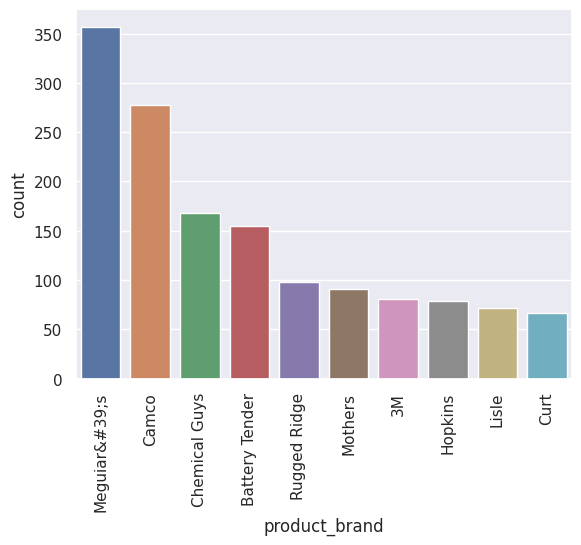

In [ ]:
# Bar Chart for top 10 product_brand #

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style = "darkgrid")
ax = sns.countplot(x='product_brand',data = reviews,
                  order=reviews['product_brand'].value_counts().sort_values(ascending=False).index[:10])

plt.xticks(rotation=90)
plt.show()

**Observation : Brands Meguiar, Camco, Chemical Guys, Battery Tender and Rugged Ridge are top 5 brands that got highest number of reviews**

In [ ]:
# Count of product_title #

reviews['product_title'].value_counts(dropna = False)

NaN                                                                                                 779
Battery Tender 021-0123 Battery Tender Junior 12V Battery Charger                                    45
3M 90100 Paint Defender System                                                                       42
Zwipes 671 Blue/Black 40&quot; x 25&quot; Ultimate Dry Combo Pocketed Drying Towel and Dry Blade     40
Griot's Garage 11088 Paint Sealant - 16 oz.                                                          37
                                                                                                   ... 
Toyota Genuine Parts 04152-YZZA1 Oil Filter                                                           1
Michelin 5020 Stealth Wiper Blade, 20&quot; (Pack of 1)                                               1
Camco 40128 Tornado Rotary Tank Rinser                                                                1
Camco 42251 Awning De-Flapper Max                               

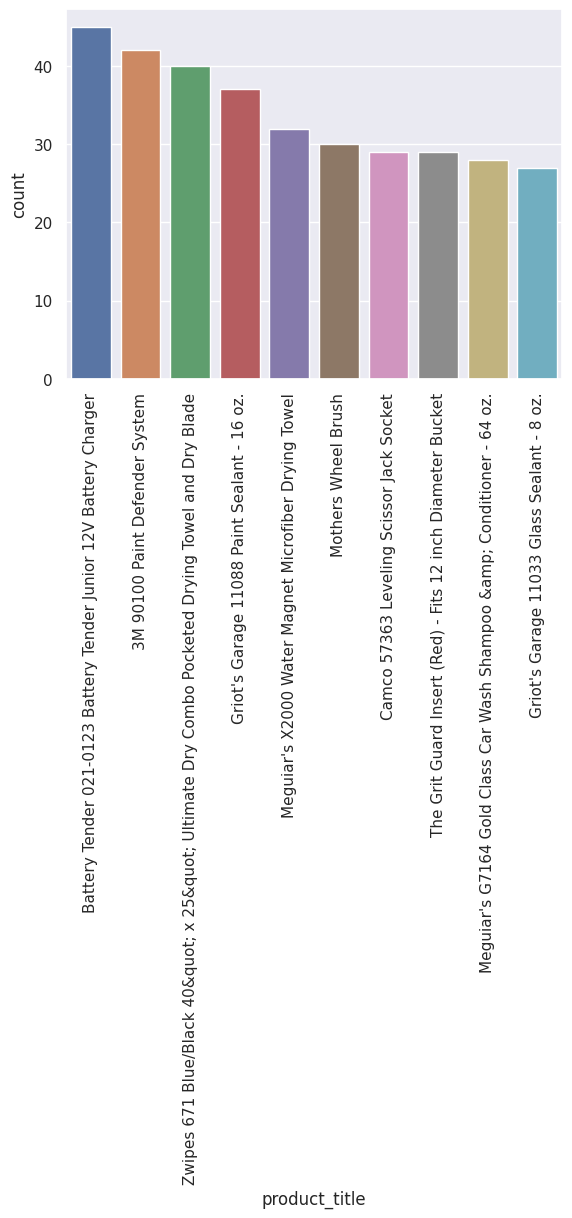

In [ ]:
# Bar Chart for top 10 product_title #

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style = "darkgrid")
ax = sns.countplot(x='product_title',data = reviews,
                  order=reviews['product_title'].value_counts().sort_values(ascending=False).index[:10])

plt.xticks(rotation=90)
plt.show()

**Observation : Battery chargers, defender system, towel and dry blade, sealant and microfiber drying towel are top 5 products that got highest number of reviews**

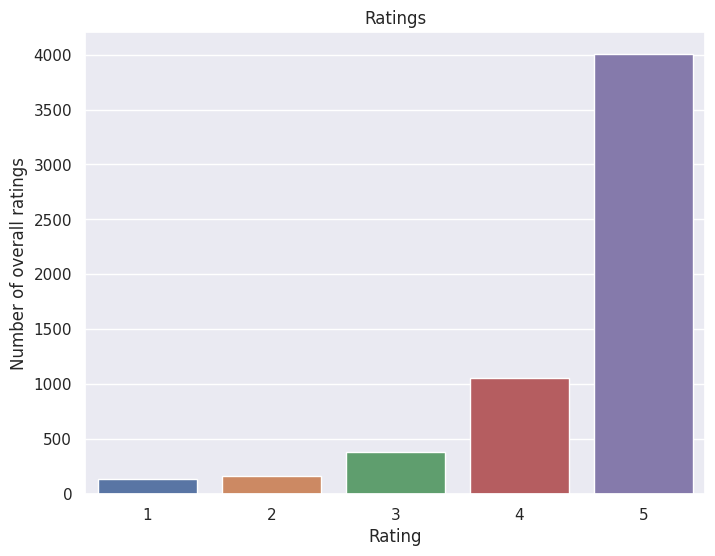

In [ ]:
# Visualize the ratings #

f, axes = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=reviews['overall'])
ax.set(title="Ratings", xlabel="Rating", ylabel="Number of overall ratings")
plt.show()

**Observation:** Maximum customers have given 5 rating. Only few customers have given 1,2 and 3 rating.

In [ ]:
# Observing overall rating with brands and product #

pivot = pd.pivot_table(reviews, values = 'overall', index = ['product_brand','product_title'
                                                 ], aggfunc = np.mean)
pivot = pivot.sort_values(by='overall', ascending=False)
pivot

overall
product_brand product_title                                              
Keeper        Keeper 02953 Winch Strap Tree Saver With Loops ...      5.0
EternaBond    EternaBond RSW-4-50 White Roof Seal                     5.0
Red Line Oil  Red Line 42904 V-Twin Primary Case Oil - 1 Quar...      5.0
Fram          Fram CA10159 Extra Guard Rigid Panel Air Filter         5.0
              Fram CA9482 Extra Guard Flexible Panel Air Filter       5.0
...                                                                   ...
XKGLOW        8x T10 194 168 501 4-smd 3528 LED Car Light Bul...      1.0
Dupli-Color   Dupli-Color TSCH100 Tire Shine Coating - 15.5 oz.       1.0
Slime         Slime 60089 Quick Spair Tire Inflator - 16 oz.          1.0
Crampbuster   Crampbuster CB4 Black Throttle Mounted Motorcyc...      1.0
Dynamat       Dynamat 10435 12&quot; x 36&quot; x 0.067&quot;...      1.0

[1145 rows x 1 columns]

**Observation : Keeper Winch Strap, EternaBond white roof seal, Red Line Oil Quart Bottle, Fram Rigid Panel Air Filter and Fram flexible panel Air Filter are among top 5 products that got highest ratings**

In [ ]:
# Observing if price has an impact on rating #

pivot2 = pd.pivot_table(reviews, values = 'product_price', index = ['overall'
                                                 ], aggfunc = np.mean)
pivot2 = pivot2.sort_values(by='product_price', ascending=False)
pivot2

,product_price
overall,
1,35.498872
4,24.893825
5,24.450263
2,22.651890
3,21.044149


**Observation:** Price seems to have an impact on the reviews that got a rating of 1. We can see that products that were rated 1 have higher average price compared to products that were rated 4 and 5.

In [ ]:
# assigning 1's for ratings 1,2 and 3 and 0's for ratings 4 and 5. Lower ratings are assumed to have negative sentiment and higher ratings containing positive sentiment.
# Since, our sentiment of concern is lower ratings (1, 2 and 3), we assigned it as 1s. #

reviews['sentiment']=reviews['overall'].replace({1:1, 2:1, 3:1, 4:0, 5:0})
reviews.head()

,reviewText,overall,summary,helpful_votes,total_votes,product_brand,product_title,product_price,sentiment
0,"I have an old car, Its bound to need these som...",5,Beefy,0,0,Coleman Cable,Coleman Cable 08662 25-Feet Heavy-Duty Booster...,55.99,0
1,Takes the dust off my car without leaving any ...,5,What to say,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,0
2,This thing is great. I had another one from a ...,5,The Best,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,0
3,"As we all know, dust gets over your rides in t...",5,california duster,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,0
4,Maybe I don't understand the finer points of k...,3,"cheaply made, picks up some dust but leaves be...",0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95,1


Lower Rating Proportion:  0.11857913982239247
Higher Rating Proportion:  0.8814208601776076


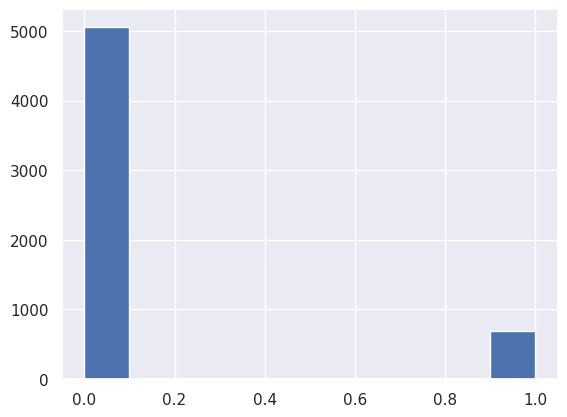

In [ ]:
# Observing class imbalance #

reviews.sentiment.hist()
print('Lower Rating Proportion: ', reviews.sentiment.mean())
print('Higher Rating Proportion: ', 1 - reviews.sentiment.mean())

**Observation : The dataset is an highly imbalanced data with around 88% positive ratings and 12% negative ratings which needs to be addressed at the modelling stage.**

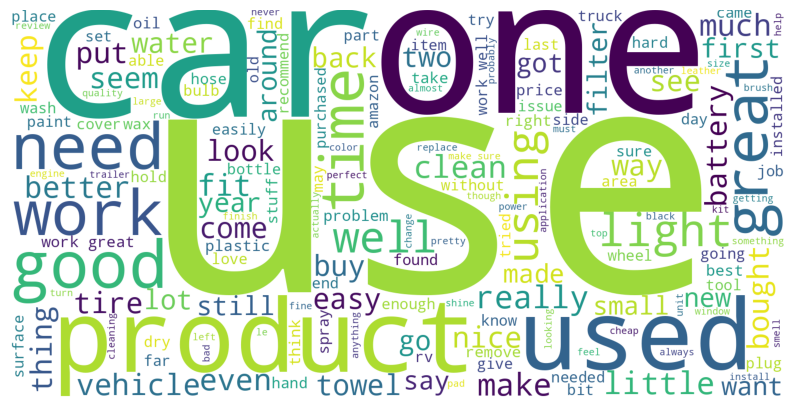

In [ ]:
unique_str=(" ").join(clean_reviews)
wordcloud = WordCloud(min_font_size=16, max_words=250, background_color="white", width=1600, height=800, random_state=123).generate(unique_str)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("wc.png")

**Observation** : Most frequently used words in the reviewText are use, car, one, product, great, need, work and others among the cloud of words. Larger word size indicates more frequently occuring words in the reviews and smaller word size indicates less frequently occuring words.

**1.3 B (7) In the text cell below, describe (in paragraph format) the dataset and any important findings from your description and EDA. A discussion of class imbalance should also be included if present.**

**Observation** :

The dataset does not have any null values in reviewText and overall column.

Very high number of customers talked about automotive detailing parts and their experience using the products.

The top 5 products having highest ratings are: Keeper Winch Strap, EternaBond white roof seal, Red Line Oil Quart Bottle, Fram Rigid Panel Air Filter and Fram flexible panel Air Filter. Not many customers voted on reviews being helpful or not.

The wordcloud show that the most frequently occuring words in the reveiwText are: use, car, one, product, great, need, word, good and so on. Among these words, the most frequently used adjectives and adverbs are: great, good, clean, old, easily, better, work great, lot, easy, nice, first, hard and so on. Looking at these adjectives and adverbs, it seems like most of them indicate positive reviews, which is supported by the proportion of positive ratings i.e. 88%.

The dataset contains more number of positive ratings (88%).
We are dealing with an imbalance data with very high proportion of positive reviews (88%) and a very small proportion of negative reviews(12%). Many classification models (Decision Trees, Random Forest, Logistic Regression, Support Vector Machines) can accept class weights, which can be used to correct for class imbalance when training classification models. We intend to apply classification techniques and choose the best model that can classify the ratings accurately.



---

<br>



# Part 2 (50)

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your Final Project Part 2 submission should include all Part 1 and Part 2 code and responses.

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

<br>

**Due:** 12/17 at 11:59 PM ET

**Points:** 50






## 2.1 Analysis (25)

**2.1 (25) Perform (at least) 3 types of classification analysis demonstrated in the course. At least one type must be a deep learning model using either a pre-trained or data-trained embedding layer.**

In [ ]:
# Dropping variables not necessary for model building

reviews.drop(['overall','summary','helpful_votes','total_votes','product_brand','product_title','product_price'], axis=1, inplace=True)

In [ ]:
reviews['reviewText'] = reviews['reviewText'].fillna('')

In [ ]:
# Assigning X and y and splitting test and train dataset to 75/25 ratio.

X = reviews['reviewText']
y = reviews['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# **TRADITIONAL CLASSIFICATION MODELS**

**2.2 A (8) Evaluate the models on both the training and testing sets to obtain both performance and goodness of fit.**

In [ ]:
# Train Model #

import numpy as np

names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "AdaBoost", "Neural Net", "Complement Naive Bayes"]

balanced = len(y_train)/(len(np.unique(y_train)) * np.bincount(y_train))

classifiers = [LogisticRegression(class_weight='balanced'),
               SVC(probability=True, class_weight='balanced'),
               DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
               RandomForestClassifier(max_depth=5, n_estimators=10, class_weight='balanced'),
               AdaBoostClassifier(),
               MLPClassifier(alpha=1, max_iter=1000),
               ComplementNB()
               ]


for name, clf in zip(names, classifiers):
  clf_pipe = Pipeline([
                    ('tfidf', TfidfVectorizer(stop_words='english',min_df=5)),
                      (name, clf),
                     ])

  clf_pipe.fit(X_train, y_train)

  pred = clf_pipe.predict(X_train)
  pred_prob = clf_pipe.predict_proba(X_train)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_train, pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_train, pred)

  print('\n\n', name, '\n\n')
  print(classification_report(y_train, pred))
  print('ROC AUC: ', auc(fpr, tpr))
  print('Precision/Recall AUC: ', auc(precision, recall))
  print('\n\n')



 Logistic Regression 


              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3800
           1       0.55      0.96      0.70       507

    accuracy                           0.90      4307
   macro avg       0.77      0.93      0.82      4307
weighted avg       0.94      0.90      0.91      4307

ROC AUC:  0.9781825495691893
Precision/Recall AUC:  0.643519737389378





 SVM 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3800
           1       1.00      1.00      1.00       507

    accuracy                           1.00      4307
   macro avg       1.00      1.00      1.00      4307
weighted avg       1.00      1.00      1.00      4307

ROC AUC:  0.9995902107339354
Precision/Recall AUC:  0.8803200163484035





 Decision Tree 


              precision    recall  f1-score   support

           0       0.99      0.30      0.46      3800
           1       0.16      0.97 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 Complement Naive Bayes 


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3800
           1       0.58      0.58      0.58       507

    accuracy                           0.90      4307
   macro avg       0.76      0.76      0.76      4307
weighted avg       0.90      0.90      0.90      4307

ROC AUC:  0.8904674037163915
Precision/Recall AUC:  0.48703845907361815





In [ ]:
# Test Model #

import numpy as np

names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "AdaBoost", "Neural Net", "Complement Naive Bayes"]

balanced = len(y_train)/(len(np.unique(y_train)) * np.bincount(y_train))

classifiers = [LogisticRegression(class_weight='balanced'),
               SVC(probability=True, class_weight='balanced'),
               DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
               RandomForestClassifier(max_depth=5, n_estimators=10, class_weight='balanced'),
               AdaBoostClassifier(),
               MLPClassifier(alpha=1, max_iter=1000),
               ComplementNB()
               ]


for name, clf in zip(names, classifiers):
  clf_pipe = Pipeline([
                    ('tfidf', TfidfVectorizer(stop_words='english',min_df=5)),
                      (name, clf),
                     ])

  clf_pipe.fit(X_train, y_train)

  pred = clf_pipe.predict(X_test)
  pred_prob = clf_pipe.predict_proba(X_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

  print('\n\n', name, '\n\n')
  print(classification_report(y_test, pred))
  print('ROC AUC: ', auc(fpr, tpr))
  print('Precision/Recall AUC: ', auc(precision, recall))
  print('\n\n')



 Logistic Regression 


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1262
           1       0.34      0.58      0.43       174

    accuracy                           0.82      1436
   macro avg       0.64      0.71      0.66      1436
weighted avg       0.86      0.82      0.83      1436

ROC AUC:  0.8117747782210322
Precision/Recall AUC:  0.3668327447264418





 SVM 


              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1262
           1       0.62      0.14      0.23       174

    accuracy                           0.89      1436
   macro avg       0.76      0.57      0.59      1436
weighted avg       0.86      0.89      0.85      1436

ROC AUC:  0.8127766544619924
Precision/Recall AUC:  0.31504938686645545





 Decision Tree 


              precision    recall  f1-score   support

           0       0.96      0.28      0.44      1262
           1       0.15      0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 Complement Naive Bayes 


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1262
           1       0.34      0.28      0.31       174

    accuracy                           0.85      1436
   macro avg       0.62      0.60      0.61      1436
weighted avg       0.83      0.85      0.84      1436

ROC AUC:  0.7410514235750588
Precision/Recall AUC:  0.23096657732491405





# **DEEP LEARNING MODEL BASED ON TRANSFORMER -**
# **BIDIRECTIONAL ENCODER REPRESENTATIONS FROM TRANSFORMERS - BERT**

In [ ]:
#Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-2_H-128_A-2'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
METRICS = [
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
clear_session()

def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dense(64,activation='relu')(net)
  net = tf.keras.layers.Dense(28,activation='relu')(net)
  net = tf.keras.layers.Dropout(0.2)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy()

In [ ]:
epochs = 10
steps_per_epoch = 100
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 5e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=METRICS)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=X_train.values,y=y_train,
                               validation_data=(X_test.values,y_test),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/10
135/135 [==============================] - 92s 632ms/step - loss: 0.5982 - accuracy: 0.6824 - precision: 0.1180 - recall: 0.2623 - auc: 0.4928 - prc: 0.1151 - val_loss: 0.3652 - val_accuracy: 0.8788 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6215 - val_prc: 0.1842
Epoch 2/10
135/135 [==============================] - 87s 645ms/step - loss: 0.3633 - accuracy: 0.8823 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5673 - prc: 0.1430 - val_loss: 0.3524 - val_accuracy: 0.8788 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6938 - val_prc: 0.2300
Epoch 3/10
135/135 [==============================] - 80s 594ms/step - loss: 0.3534 - accuracy: 0.8823 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6319 - prc: 0.1718 - val_loss: 0.3420 - val_accuracy: 0.8788 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7136 - val_prc: 0.

In [ ]:
model_results = classifier_model.evaluate(X_train.values, y_train, batch_size=128, verbose=0)

for name, value in zip(classifier_model.metrics_names, model_results):
  print(name, ': ', value)

loss :  0.2709038555622101
accuracy :  0.8920361995697021
precision :  0.681034505367279
recall :  0.15581853687763214
auc :  0.8632460832595825
prc :  0.4949764013290405


In [ ]:
model_results = classifier_model.evaluate(X_test.values, y_test, batch_size=128, verbose=0)

for name, value in zip(classifier_model.metrics_names, model_results):
  print(name, ': ', value)

loss :  0.3178168833255768
accuracy :  0.8767409324645996
precision :  0.4545454680919647
recall :  0.08620689809322357
auc :  0.7772282361984253
prc :  0.32317283749580383


**2.2 B (7) Based on your output in 2.2A, discuss and compare the goodness of fit and performance for each of the classification models. Which model is preferred? Why? Explain.**

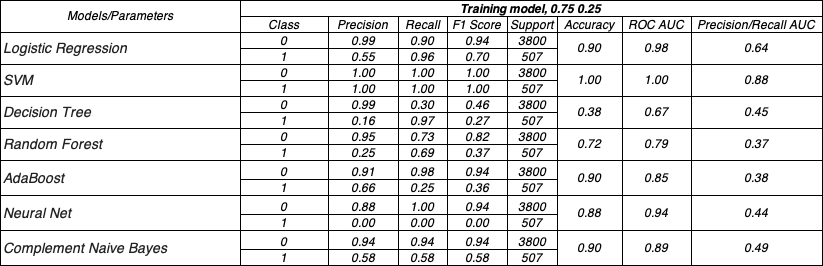

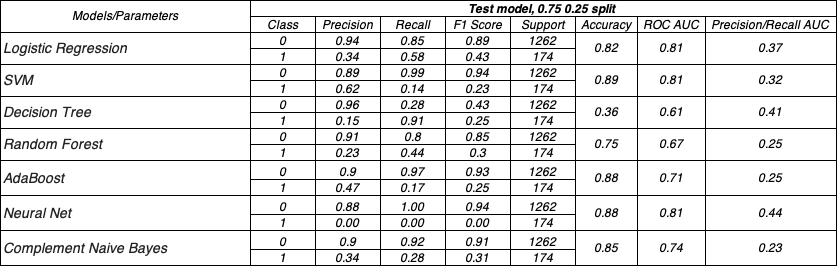








We are dealing with an highly imbalanced data with around 12% negative ratings and 88% of positive ratings. We are interested in the negative class. We are assigning 1's for lower ratings of 1,2 and 3 and 0's for higher ratings of 4 and 5. Lower ratings are assumed to have negative sentiment and higher ratings containing positive sentiment.

**COMPARISON OF MODELS:**

The Decision Tree model demonstrates a moderate ROC AUC. But otherwise has a low performance with other metrics.

The Random Forest model show a fair Accuracy and ROC AUC but lags behind with other metrics.

The boosted tree model and Neural Net do not handle class imbalance very well.

**BERT MODEL:**

The area under the ROC curve for the training set is higher compared to the area under the ROC curve for the test set.

The area under the precision recall curve for the training set is higher compared to the area under the precision recall curve for the test set.

The precision is higher on training set as compared to test set indicating a very high chance of false negatives.

The performance is high on training set compared to test set which means model is overfitting.

**MODEL SELECTION:**

With balanced class weights both Logistic and SVM models perform well across metrics. SVM model has the highest ROC AUC of 0.81 and Precision/Recall AUC of 0.32. But, SVM models can be considered when we are dealing with more than two classes.

Here we are dealing with only 2 classes. With highest ROC AUC and Precision/Recall AUC next to SVM, Logistic Regression model is a good model to consider.

**GOODNESS OF FIT : LOGISTIC REGRESSION MODEL**

The area under ROC curve and precision recall curve for the training set is higher compared to area under ROC curve and precision recall curve for the test set indicating the model does not perform well on test set.

The Precision of 0.55 on training set vs the precision of 0.34 on the test set indicates a high chance of false negatives.

The accuracy of 90% on training set vs the accuracy of 82% on test set indicates an overfitting model.



## 2.3 Discussion & Conclusion (10)

**2.3 (10) Briefly summarize the problem statement and data. Then, discuss your analysis and findings. Within the context of the business problem and your analysis results, provide business recommendations. Be sure to discuss any limitations, constraints, or ethical concerns that could impact the implementation of the recommended solution.**

**BRIEF INFORMATION ON PROBLEM STATEMENT AND DATA**

The problem statement of the project is 'Customer Sentiment Prediction'. Understanding customer's feedback on products and services rendered through Amazon is a serious business issue. This helps in taking necessary action promptly. With the project, Amazon is more interested in correctly predicting the negative sentiment of its customers.

The dataset has a total of 5743 records of customer's reviews and 11 attributes. Among those attributes, 'reviewText' and 'overall' are the ones taken for model building. 'reviewText' contains the text review of the product and services and is the predictor variable. 'overall' attribute has the ratings from 1 to 5. We have created a new variable 'sentiment' that takes the value of 1s for 'overall' values of 1, 2 and 3 and 0s for 'overall' values of 4 and 5. Since, we are concerned with negative sentiment of customers, we have encoded the 'overall' with negative values of 1, 2 and 3 as 1s in sentiment. This sentiment variable is the target variable for the models. Apart from these attributes, other attributes in the dataset are: Asin, reviewerID, unixReviewTime, helpful_votes, total_votes, product_brand, product_title, product_price. We have used some of these attributes for our exploratory data analysis. The dataset is imbalanced since the proportion of negative sentiment is only 11.85% and the positive sentiment is 88.14%.

**ANALYSIS AND FINDINGS**

We have developed 7 traditional classification models and one deep learning model based on transformer - BERT. For the traditional classification models, we have added class weight - balanced on the models which can account for imbalanced dataset. After analysis of all the models, we could see that all the models had ROC AUC greater than 0.50 indicating them to have a predictive value. While comparing the models, we found that Logistic Regression has the highest ROC AUC value of 0.8117 indicating it to have better performance compared to other models. Logistic Regression has a Precision of 0.34, Recall of 0.58 and F1 score a harmonic mean of Precision and Recall of 0.43 and precision recall curve AUC of 0.3668. A precision of 0.34 indicates that 34% of sentiment predicted is actually a negative sentiment. A recall of 0.58 indicates 58% of negative sentiment correctly identified by the model. Hence, based on the ROC AUC value, it seems like Logistic Regression is the best model.

We also noticed that all the datasets are overfitted since, the models are performing better in training dataset in comparison to testing dataset. When a model is underfit, it is not capable to capture relevant patterns in a dataset. However, if a model is overfit, any noise in the dataset disturbs the fit significantly, as it is too much focused on the training data. The perfomance metrics of the testing and training dataset depicts that the model is more focused on training dataset and hence, its performance is high in comparison.

**BUSINESS RECOMMENDATION**

Based on the business problem and our analysis, we recommend Amazon to use Logistic Regression for customer sentiment prediction. However, a good model of Amazon depends on what Amazon is focusing on. If it is focusing only on Precision we recommend SVM, which has a value of 0.62 and faily good but it is at the expense of recall that has only 0.14. If Amazon is looking only at recall, then it can select Decision Tree having recall of 0.91, which is very good but is at the expense of precision, which has a value of only 0.15 and is very poor. Hence, if Amazon is interested in a model good in terms of both precision and recall, it can select Logistic Regression with highest ROC AUC to predict negative sentiment.

**LIMITATION/ CONSTRAINS OR ETHICAL CONCERNS**

One of the limitations of this project is that this is an imbalanced dataset and several issues arise when we are dealing with it. The models may exhibit bias towards the majority class, resulting a poor prediction of minority class. We tried to handle the issue by assigning class weight balanced on certain models that accept it. However, we could also try for resampling the dataset by over-sampling the minority class to make it balanced and compare the results.

The other limitation is the overfitted model. The models we analyzed are all overfitted and when it happens, machine learning algorithm becomes too specific to training dataset and doesn't generalize well to other new data. This might result in poor accuracy or wholly inaccurate prediction. Cross validation, training with more data, ensembling techniques are some of ways to prevent overfitting.

Hence, Amazon can try implementing the Logistic Regression model to predict its customer sentiment. However, if the limitations as discussed above are overcomed, then it will increase the reliability of the model.